In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)


In [7]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
recent = session.query(func.max(measurement.date)).all()
recent

[('2017-08-23',)]

C:\Users\MSI\AppData\Local\Temp\ipykernel_3348\1895137482.py:16: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  pre_chart = df.plot(sort_columns = True, rot=45, use_index = True)


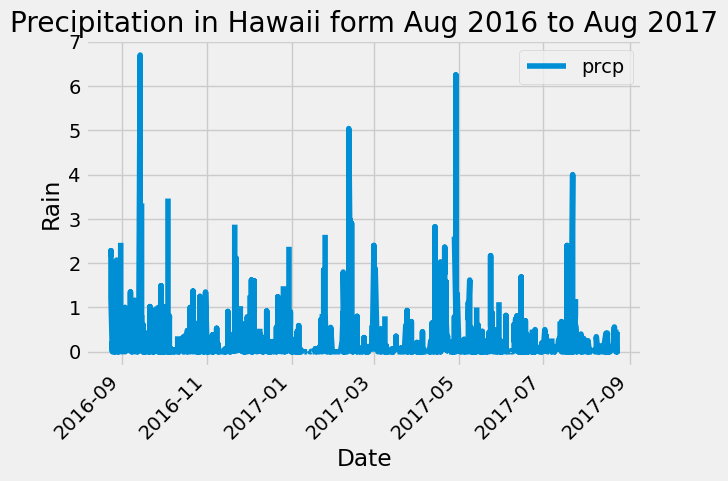

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
precipitation = session.query(measurement.date, measurement.prcp).filter(measurement.date >= "2016-08-24").filter(measurement.date <= "2017-08-23").all()

# Calculate the date one year from the last date in data set.
df = pd.DataFrame(precipitation)


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df["date"] = pd.to_datetime(df["date"])

# Sort the dataframe by date
df = df.set_index("date")

# Use Pandas Plotting with Matplotlib to plot the data
pre_chart = df.plot(sort_columns = True, rot=45, use_index = True)
plt.ylabel('Rain')
plt.xlabel('Date')
plt.title('Precipitation in Hawaii form Aug 2016 to Aug 2017')
plt.show()


In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(station.id)).all()
station_count

[(9,)]

In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# most active is USC00519281
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == "USC00519281").all()


[(54.0, 85.0, 71.66378066378067)]

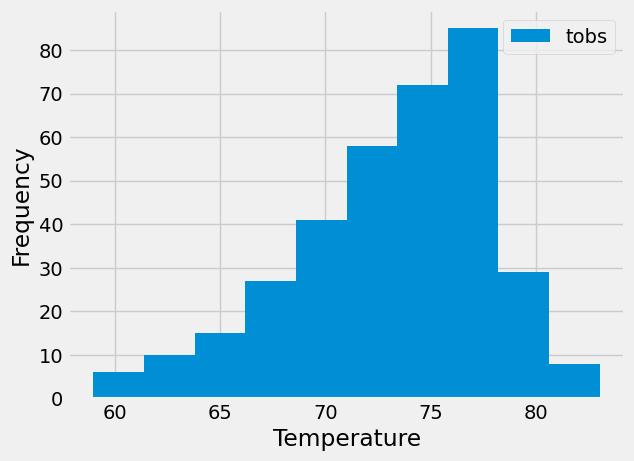

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data = session.query(measurement.date, measurement.tobs).filter_by(station = 'USC00519281').filter(measurement.date >= '2016-08-24').all()
df = pd.DataFrame(data)
df.plot.hist()
plt.legend(loc="best")
plt.xlabel('Temperature')
plt.ylabel("Frequency")
plt.show()

# Close Session

In [27]:
# Close Session
session.close()